In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import sys
sys.path.append("..")
from common import *
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [5]:
c1_NAT = pd.read_csv("../data/fourcancers/client1_iid_Tumor.csv")
c2_NAT = pd.read_csv("../data/fourcancers/client2_iid_Tumor.csv")
c3_NAT = pd.read_csv("../data/fourcancers/client3_iid_Tumor.csv")

In [6]:
allc_NAT = pd.concat((c1_NAT, c2_NAT, c3_NAT))

In [36]:
km = KMeans(n_clusters = 4)
km.fit(allc_NAT.values)

score = silhouette_score(allc_NAT.values, km.predict(allc_NAT.values))

In [37]:
score

0.042476303399053644

In [7]:
NAT_PCA = PCA(n_components = 100)

NAT_PCA.fit(allc_NAT.values)


PCA(n_components=100)

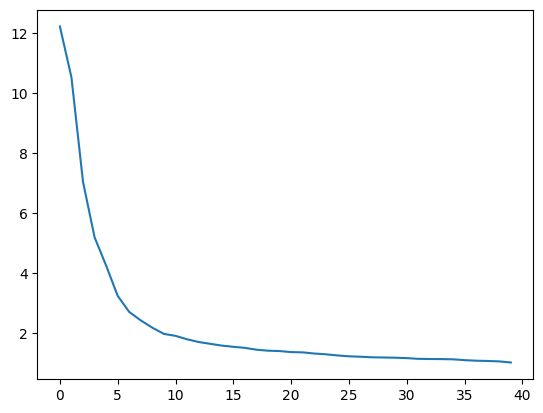

In [9]:
plt.plot(NAT_PCA.explained_variance_[:40])

In [11]:
NAT_PCA = PCA(n_components = 5).fit_transform(allc_NAT.values)

km = KMeans(n_clusters = 4)
km.fit(NAT_PCA)

scores_pca = silhouette_score(NAT_PCA, km.predict(NAT_PCA))

In [12]:
scores_pca

0.21132326570253773

In [40]:
n_cluster_options = [4, 6, 8, 10, 12]


NAT_PCA = PCA(n_components = 10).fit_transform(allc_NAT.values)
scores_pca = np.zeros(len(n_cluster_options))

for i, n_cluster in enumerate(n_cluster_options):  
    km = KMeans(n_clusters = n_cluster)
    km.fit(NAT_PCA)

    scores_pca[i] = silhouette_score(NAT_PCA, km.predict(NAT_PCA))

In [7]:
plt.plot(n_cluster_options,scores_pca, ".")
# plt.xticks([0, 1, 2, 3, 4])

NameError: name 'n_cluster_options' is not defined

In [39]:
score_pca

0.14990772773621652

In [2]:
all_data = pd.read_csv("../data/fourcancers/fourcancers_orig.csv", index_col = 0)

In [3]:
all_data = all_data.transpose()

In [6]:
data_arr = all_data.values

In [10]:
data_pca = PCA(n_components = 10).fit_transform(data_arr)

In [11]:
data_pca.shape

(127588, 10)

In [15]:
km = KMeans(n_clusters = 8)
km.fit(data_arr)

score = silhouette_score(data_arr, km.predict(data_arr))

In [12]:
silhouette_score(data_arr, km.predict(data_arr))

0.039674633535703926

In [18]:
km = KMeans(n_clusters = 8)
km.fit(data_pca)

score_pca = silhouette_score(data_pca, km.predict(data_pca))

In [19]:
score, score_pca

(0.026345704019680193, 0.12779536098731403)

In [14]:
score

0.13771047548469706